In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
#Drop
#ID - Not relevnt
#Utilities - All observations are the same.
#Street - All observations are the same.
#Condition2 - Most of the observations are the same.
#RoofMatl - Most of the observations are the same.
#####Exterior1st - The house Exterior covering doesn't reflect any trend in the house pricing
#MasVnrType - Most of the of the obvservation are NAN
#####BsmtFinType1 - This feature is determined by his size
#####BsmtFinType2 - This feature is determined by his size
#Heating - does not include informative values
#####Fireplaces - does not include informative values
#####FireplaceQu - does not include informative values
#GarageCond - does not include informative values
#MiscFeature - Not enough data
#SaleType - The project is the important thing and not how they finance it
#SaleCondition - The value of the house does not depend on the way it sold
#3SsnPorch - Most of the observations are the same.
#MiscVal - Most of the observations are 0.
#PoolArea - there is only 6 observations.
#PoolQC - there is only 6 observations.

In [6]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [7]:
df.drop('Id',inplace=True,axis=1)
df.drop('Utilities',inplace=True,axis=1)
df.drop('Street',inplace=True,axis=1)
df.drop('Condition2',inplace=True,axis=1)
df.drop('RoofMatl',inplace=True,axis=1)
df.drop('MasVnrType',inplace=True,axis=1)
df.drop('Heating',inplace=True,axis=1)
df.drop('GarageCond',inplace=True,axis=1)
df.drop('3SsnPorch',inplace=True,axis=1)
df.drop('MiscFeature',inplace=True,axis=1)
df.drop('MiscVal',inplace=True,axis=1)
df.drop('SaleType',inplace=True,axis=1)
df.drop('SaleCondition',inplace=True,axis=1)
df.drop('PoolArea',inplace=True,axis=1)
df.drop('PoolQC',inplace=True,axis=1)

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,61,0,0,NaN,2,2008,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,298,0,0,0,NaN,5,2007,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,42,0,0,NaN,9,2008,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,0,35,272,0,NaN,2,2006,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,192,84,0,0,NaN,12,2008,250000


In [9]:
df.shape

(1460, 66)

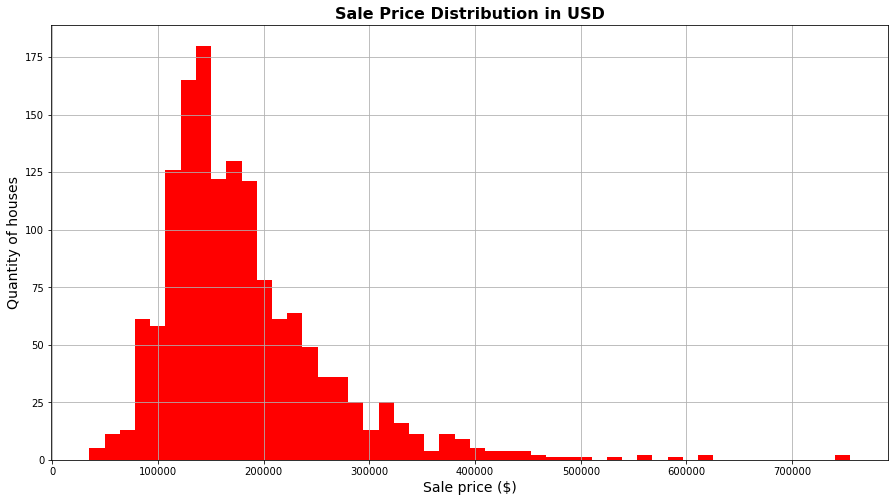

In [10]:
plt.figure(figsize = (15,8))
plt.hist(df['SalePrice'],bins=50,color = 'r')
plt.xlabel("Sale price ($)", fontsize=14)
plt.ylabel("Quantity of houses", fontsize=14)
plt.title('Sale Price Distribution in USD', fontsize=16, fontweight='bold')
plt.grid()

Text(0, 0.5, 'Lot Area')

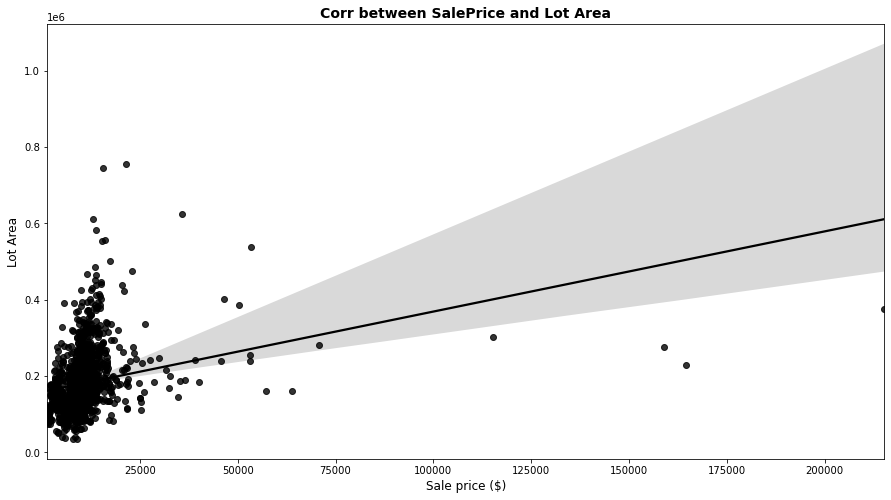

In [11]:
plt.figure(figsize=(15,8))
sns.regplot(data = df, x='LotArea', y='SalePrice', color = 'k')
plt.title('Corr between SalePrice and Lot Area', fontsize=14, fontweight='bold')
plt.xlabel("Sale price ($)", fontsize=12)
plt.ylabel("Lot Area", fontsize=12)

Text(0, 0.5, 'Sale Price')

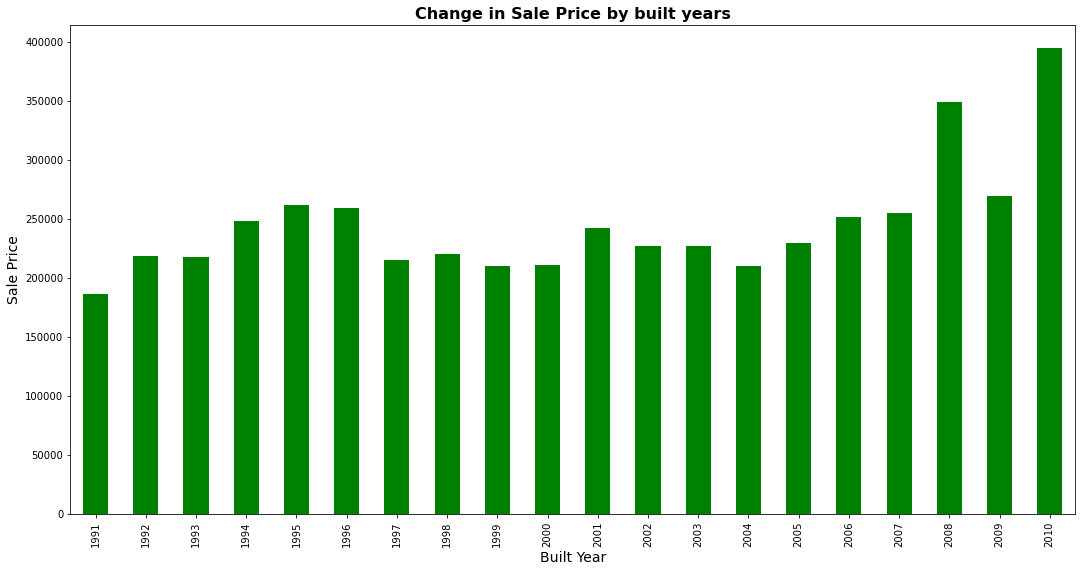

In [12]:
plt.figure(figsize = (18,9))
df1990 = df[df['YearBuilt']>1990]
group = df1990.groupby(['YearBuilt']).SalePrice.mean().plot.bar(color='g')
plt.title('Change in Sale Price by built years',fontsize=16, fontweight='bold')
plt.xlabel("Built Year", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)

Text(0, 0.5, 'Sale Price')

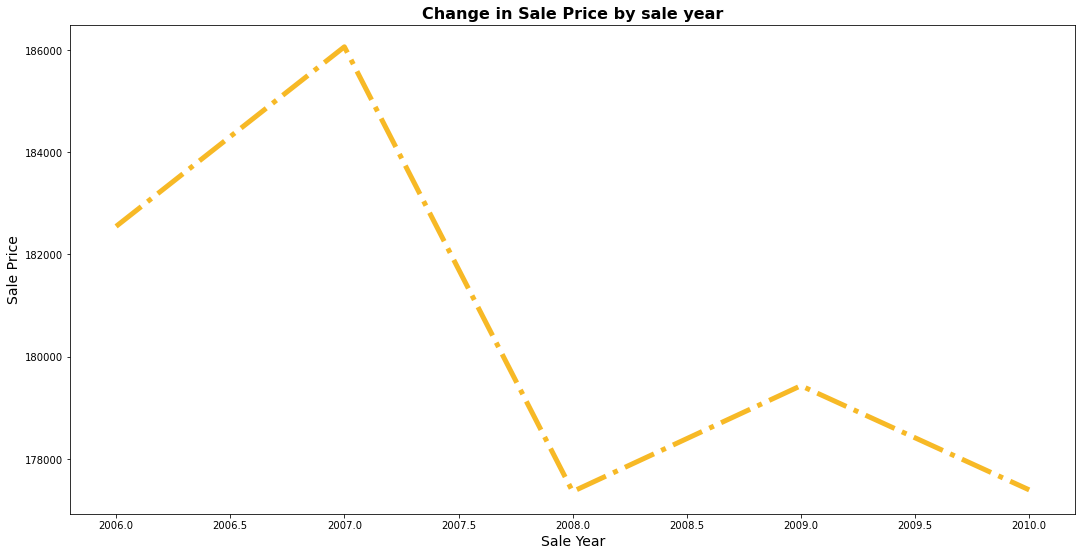

In [13]:
plt.figure(figsize = (18,9))
df.groupby(['YrSold']).SalePrice.mean().plot.line(color='#F7B926', linestyle= 'dashdot', linewidth=5)
plt.title('Change in Sale Price by sale year',fontsize=16, fontweight='bold')
plt.xlabel("Sale Year", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)

Text(0, 0.5, 'Sale Price')

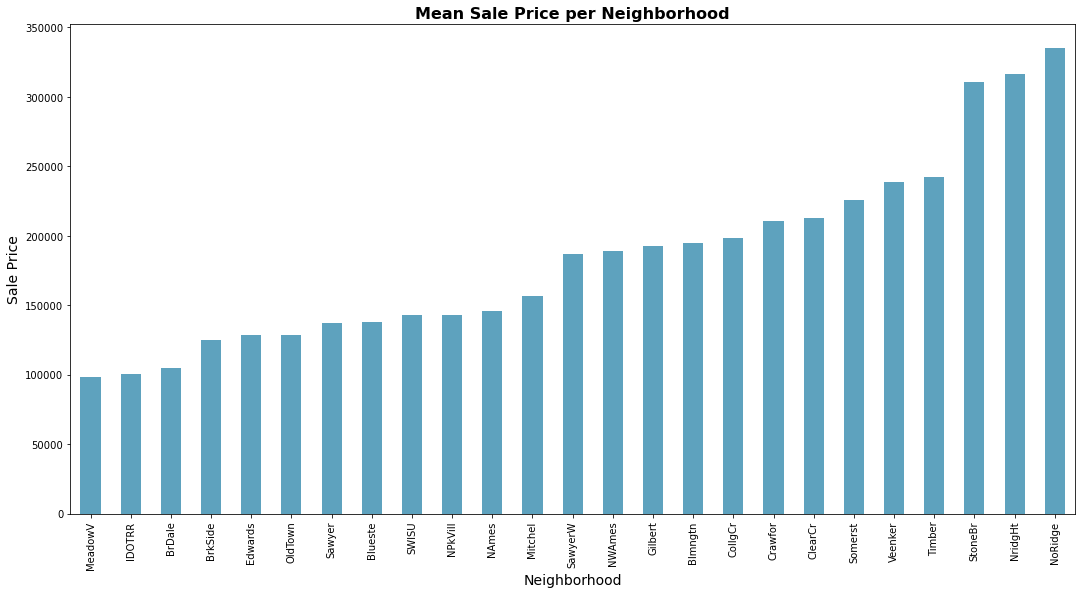

In [14]:
plt.figure(figsize = (18,9))
groupNeb = df.groupby(['Neighborhood']).SalePrice.mean().sort_values().plot.bar(color='#5EA2BE')
plt.title('Mean Sale Price per Neighborhood' ,fontsize=16, fontweight='bold')
plt.xlabel("Neighborhood", fontsize=14)
plt.ylabel("Sale Price", fontsize=14)

Text(0.5, 0, 'corr')

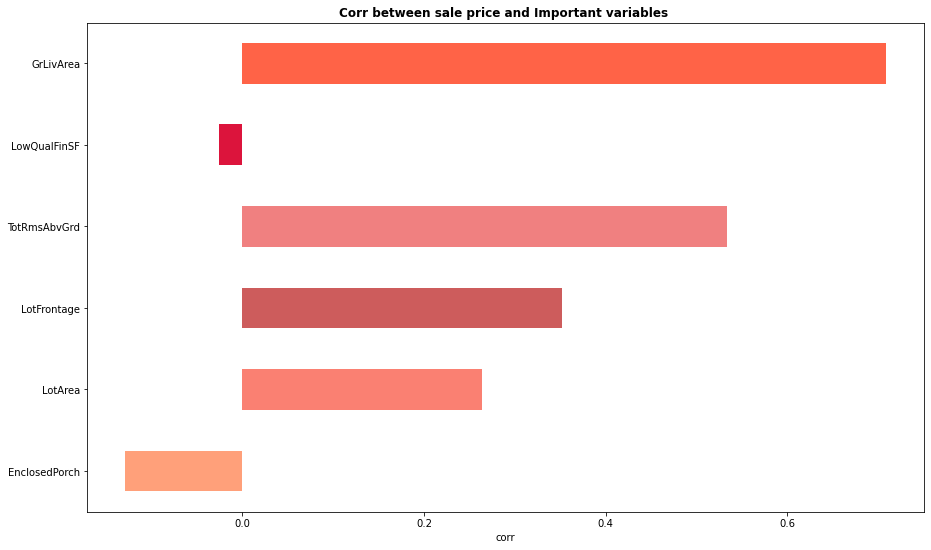

In [15]:
plt.figure(figsize = (15,9))
df1 = df[['SalePrice','EnclosedPorch','LotArea', 'LotFrontage', 'PavedDrive', 'TotRmsAbvGrd', 'LowQualFinSF', 'GrLivArea']]
df1.corr()['SalePrice'].drop('SalePrice').plot(kind='barh',color = ['#FFA07A','#FA8072','#CD5C5C', '#F08080','#DC143C','#FF6347'])
plt.title('Corr between sale price and Important variables ',fontsize=12, fontweight='bold')
plt.xlabel("corr")

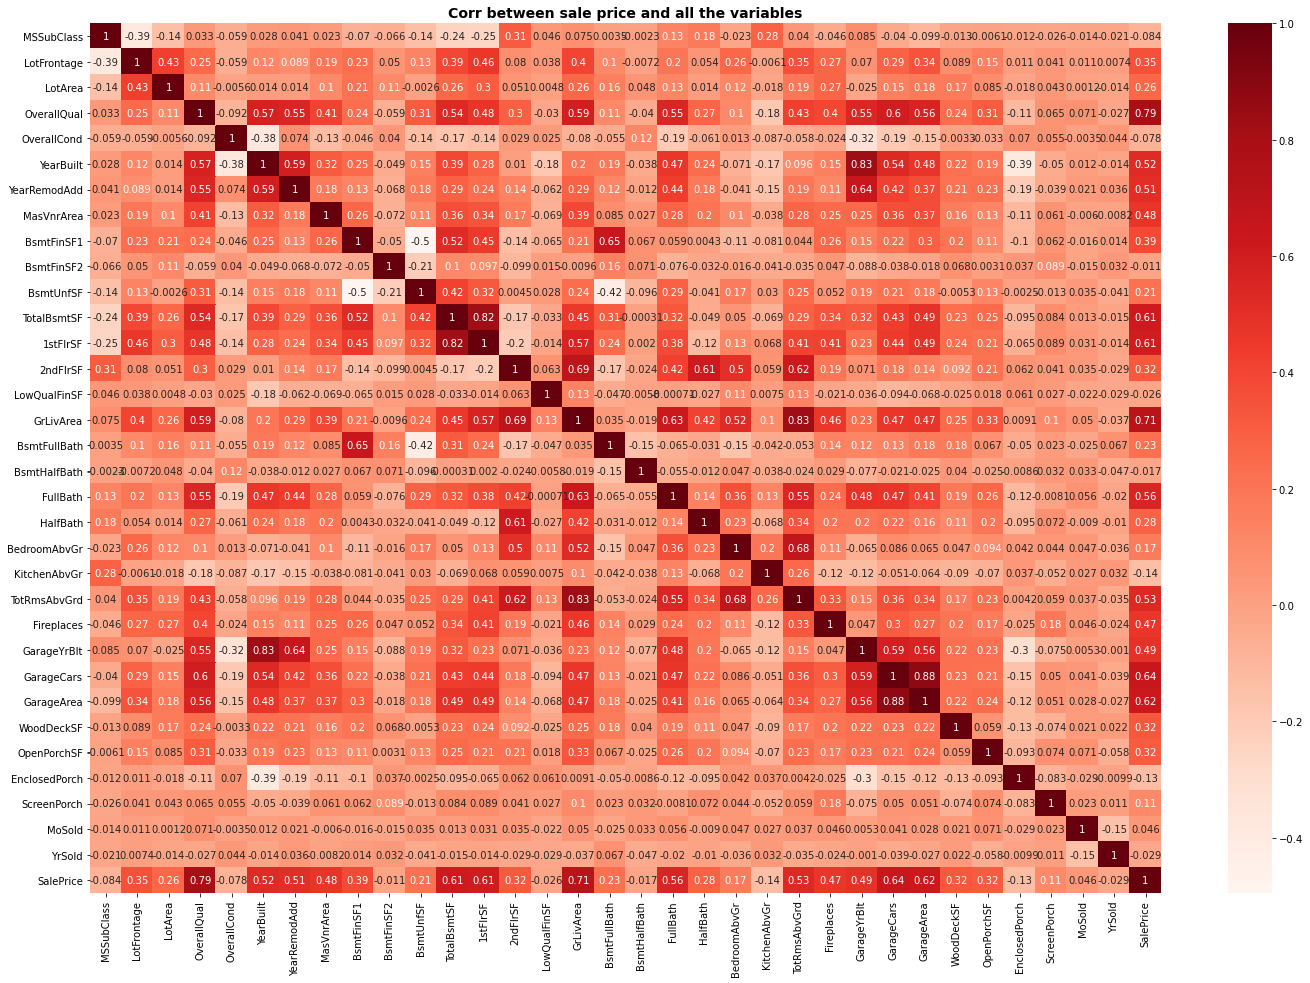

In [16]:
plt.figure(figsize=(24,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Corr between sale price and all the variables',fontsize=14, fontweight='bold')
plt.show()

# Feature engineering

In [17]:
#Because there are almost 30 different neighborhoods, we will group the neighborhoods as 'poor', 'average' and 'high'
    
groupNebb = df.groupby(['Neighborhood']).SalePrice.mean().sort_values()

poor = [i for i in groupNebb.keys()][:12]
average = [i for i in groupNebb.keys()][12:-3]
high_society = [i for i in groupNebb.keys()][-3:]
df.loc[df['Neighborhood'].isin(poor),'Neighborhood'] = 'poor'
df.loc[df['Neighborhood'].isin(average),'Neighborhood'] = 'average'
df.loc[df['Neighborhood'].isin(high_society),'Neighborhood'] = 'high_society'    

In [18]:
## Dummies variables -
# MSZoning, Alley, LotShape, LandContour, LotConfig, LandSlope, Condition1, BldgType, HouseStyle(??), RoofStyle,
# Foundation, Electrical,GarageType, Fence, Neighborhood  

#  Set a Categorical without relation to order 
df.MSSubClass = pd.Categorical(df.MSSubClass,ordered=False)

#  LotFrontage: Linear feet of street connected to property
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

#  Alley: Type of alley access to property changed for dummies
df.Alley = df.Alley.fillna(0)

#  MasVnrArea: Masonry veneer area in square feet
df.MasVnrArea = df.MasVnrArea.fillna(0)

# Replacing the neighborhood values with the average price of houses in each neighborhood - Canceled
#df.Neighborhood = mean_encoding(df,'Neighborhood','SalePrice')


##  ExterQual: Evaluates the quality of the material on the exterior 
df['ExterQual_1to5'] = df.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

##  ExterCond: Evaluates the present condition of the material on the exterior 
df['ExterCond_1to5'] = df.ExterCond.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

##  BsmtQual: Evaluates the height of the basement 
df['BsmtQual_0to5'] = df.BsmtQual.replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0])
df.BsmtQual_0to5 = df.BsmtQual_0to5.fillna(0)

##  BsmtCond: Evaluates the general condition of the basement 
df['BsmtCond_0to5'] = df.BsmtCond.replace(['Ex','Gd','TA','Fa','Po','NA'],[5,4,3,2,1,0])

##BsmtExposure: Refers to walkout or garden level walls 
df['BsmtExposure_0to3'] = df.BsmtExposure.replace(['Gd','Av','MN','NO','NA'],[3,2,1,0,0])

##HeatingQC: Heating quality and condition
df['ExterQual_1to5'] = df.ExterQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#CentralAir: Central air conditioning
df['CentralAir'] = df.CentralAir.replace(['Y','N'],[1,0],inplace=True)

##KitchenQual: Kitchen quality 
df['KitchenQual_1to5'] = df.KitchenQual.replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

##Functional: Home functionality 
df['Functional_1to8'] = df.Functional.replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],[8,7,6,5,4,3,2,1])

#GarageType: Garage location 
df.GarageType = df.GarageType.fillna('No_Garage')

##GarageFinish: Interior finish of the garage 
df.GarageFinish = df.GarageFinish.fillna('No_Garage')
df['GarageFinish_0to3'] = df.GarageFinish.replace(['Fin','RFn','Unf','NO_Garage'],[3,2,1,0])

##GarageQual: Garage quality
df.GarageQual = df.GarageQual.fillna('No_Garage')
df['GarageQual_0to5'] = df.GarageQual.replace(['Ex','Gd','TA','Fa','Po','No_Garage'],[5,4,3,2,1,0])

##PavedDrive: Paved driveway
df['PavedDrive'] = df.PavedDrive.replace(['Y','N','P'],[1,0,0],inplace=True)

#Fence - type of Fence
df.Fence = df.Fence.fillna('No_Fence')

In [19]:
df = pd.get_dummies(df)

In [20]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence_MnWw,Fence_No_Fence,BsmtExposure_0to3_2,BsmtExposure_0to3_3,BsmtExposure_0to3_Mn,BsmtExposure_0to3_No,GarageFinish_0to3_1,GarageFinish_0to3_2,GarageFinish_0to3_3,GarageFinish_0to3_No_Garage
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,1,0,0,0,1,0,1,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,1,0,1,0,0,0,1,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,1,0,0,1,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,1,0,0,0,1,1,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,1,1,0,0,0,0,1,0,0


In [21]:
#important point - GarageYrBlt drop 81 rows
df = df.dropna()

In [22]:
df.shape

(1349, 236)

## Preprocessing feature selection

In [23]:
corr = df.corr()

In [24]:
#Check if there are 2 variables with a correlation of 0.9 or higher, if yes remove one of them.

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
data = df[selected_columns]

In [25]:
data.shape

(1349, 218)

In [26]:
#Remove variables with a correlation less than 0.1 with the target variable

corr = pd.Series(data.corrwith(data['SalePrice']).sort_values())
data.drop(corr[(corr<0.1) & (corr>(-0.1))].index,inplace= True,axis=1)

/Users/hodaya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
data.shape

(1349, 111)

## train test split

In [28]:
from sklearn.model_selection import train_test_split
X, y = data.drop('SalePrice', axis=1), data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1011, 110), (1011,), (338, 110), (338,))

In [29]:
#scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Canceled - StandardScaler Improves performance better

#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#def scaleColumns(df, X):
#    for col in X:
#        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
#    return df

# evaluation function 

In [31]:
#Canceled- We tried RMSE, but MAE works better
#from sklearn.metrics import mean_squared_error
#from math import sqrt 

In [32]:
from sklearn.metrics import mean_absolute_error
def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean absolute error is {1:.4f} (mae train {2:.4f})'.format(model_name, mae, mae_train))
    return mae, mae_train

In [33]:
models_errors = {}
models_errors_train = {}

# Moodels

## baseline

In [34]:
average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mae = mean_absolute_error(y_test, y_pred)
models_errors['Baseline'] = model_mae
print ("Baseline mean absolute error is" , model_mae )

Baseline mean absolute error is 55902.484586706


## Liner regression

In [35]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
model_mae, mae_train = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

LinearRegression mean absolute error is 20482.4423 (mae train 17298.5203)


## KNN 

#### Let's check what is the best K value (Neighbors)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
train_MAE = []
test_MAE = []

for i in range(1,25):
    kn = KNeighborsRegressor(n_neighbors=i)
    kn.fit(X_train, y_train)
    y_train_pred = kn.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = kn.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))

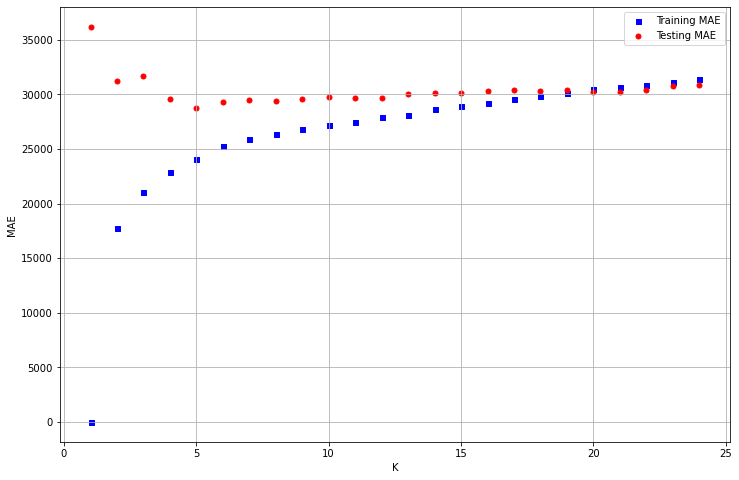

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 25), train_MAE, s=25, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 25) ,test_MAE, s=25, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("K")

plt.legend(loc='upper right')
plt.grid()
plt.show()

#### the best K is k=5 

### KNN Regressor

In [38]:
k = 5
nearest_neighbors = KNeighborsRegressor(k)
model_mae, mae_train = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

KNeighborsRegressor mean absolute error is 28765.8095 (mae train 24041.0924)


### KNN Regressor scaled - (best K is 4)

In [39]:
k = 4
nearest_neighbors = KNeighborsRegressor(k)
model_mae, mae_train = check_regressor(nearest_neighbors, X_train_scaled, y_train, X_test_scaled, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

KNeighborsRegressor mean absolute error is 23018.6213 (mae train 18998.9862)


## Decision Tree 

#### Let's check what is the best depth

In [40]:
from sklearn.tree import DecisionTreeRegressor
train_MAE = []
test_MAE = []

for i in range (1,20): 
    trees = DecisionTreeRegressor(max_depth = i, random_state = 0)
    trees.fit (X_train,y_train)
    y_train_pred = trees.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = trees.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))   

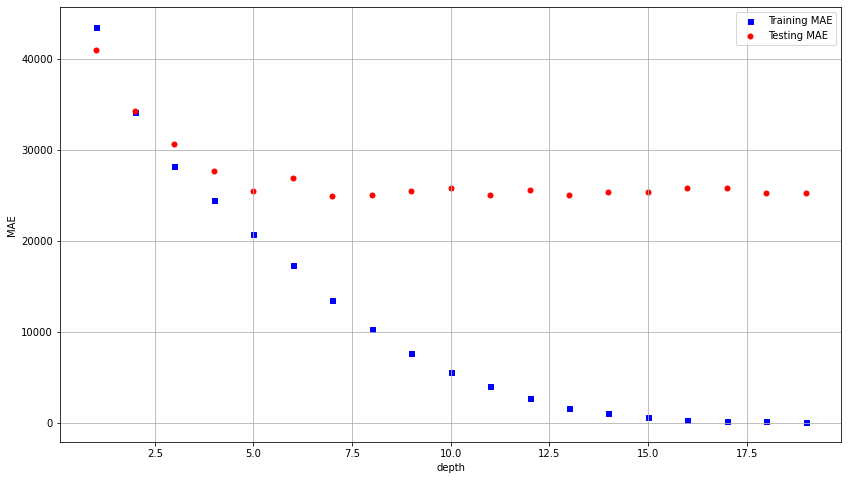

In [41]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 20), train_MAE, s=25, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 20) ,test_MAE, s=25, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("depth")

plt.legend(loc='upper right')
plt.grid()
plt.show()

#### the best depth is depth = 7

### Decision Tree regeessor

In [81]:
max_depth = 7
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mae, mae_train = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

DecisionTreeRegressor mean absolute error is 24896.2093 (mae train 13558.0667)


## Random forest 

#### Let's check the best n_estimators

In [43]:
from sklearn.ensemble import RandomForestRegressor
train_MAE1 = []
test_MAE1 = []

n_estimators_values = [5,10,30,50,80,100,150]
for i in n_estimators_values :
    randomforest = RandomForestRegressor(n_estimators=i, max_depth=8, random_state=0)
    randomforest.fit(X_train, y_train)
    y_train_pred = randomforest.predict(X_train)
    train_MAE1.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = randomforest.predict(X_test)
    test_MAE1.append(mean_absolute_error(y_test, y_test_pred)) 

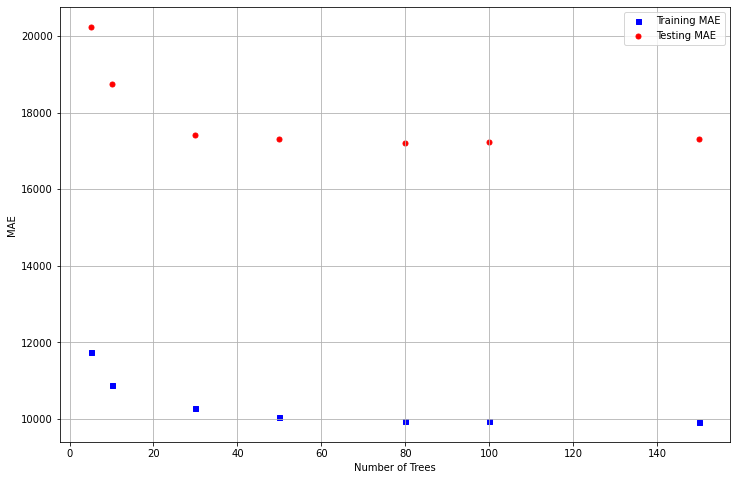

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(n_estimators_values, train_MAE1, s=25, c='b', marker="s", label='Training MAE')
ax1.scatter(n_estimators_values ,test_MAE1, s=25, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Number of Trees")
plt.legend(loc='upper right');
plt.grid()
plt.show()

#### The best n_estimators is 80

#### Let's check what is the best depth

In [45]:
train_MAE_forest = []
test_MAE_forest = []

for i in range(1,20): 
    randomforest = RandomForestRegressor(n_estimators=80, max_depth = i, random_state = 0)
    randomforest.fit (X_train,y_train)
    y_train_pred = randomforest.predict(X_train)
    train_MAE_forest.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = randomforest.predict(X_test)
    test_MAE_forest.append(mean_absolute_error(y_test, y_test_pred))  

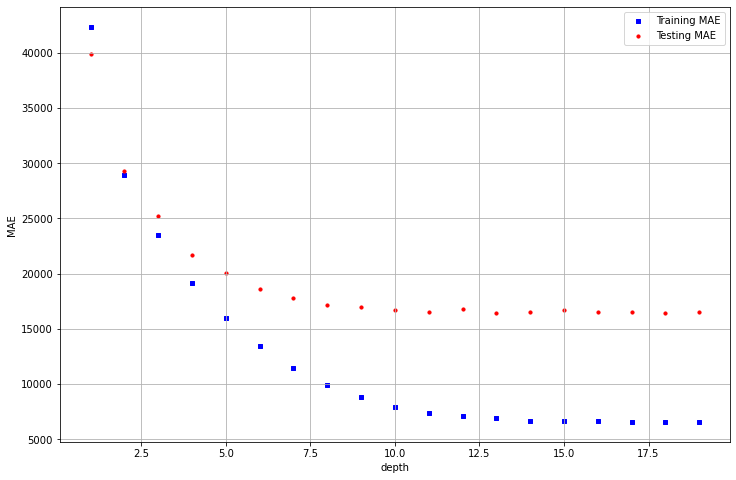

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 20), train_MAE_forest, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 20) ,test_MAE_forest, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("depth")

plt.legend(loc='upper right')
plt.grid()
plt.show()

#### The best dapth is 9

### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 9
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mae, mae_train = check_regressor(random_forest, X_train, y_train, X_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

RandomForestRegressor mean absolute error is 16955.2314 (mae train 8821.4837)


#### Features importance in the Random Forest

Text(0, 0.5, 'Features')

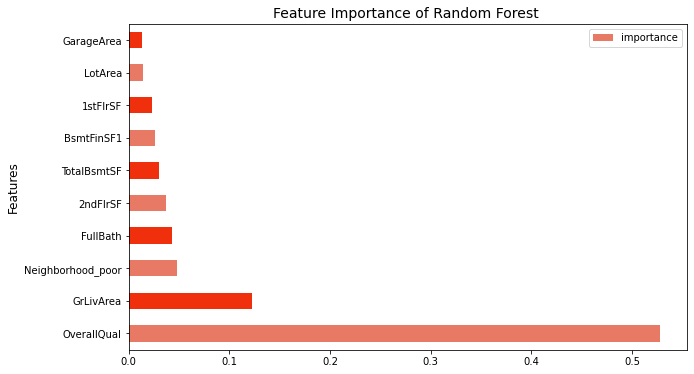

In [84]:
feature_importances = random_forest.feature_importances_ 
features = X_train.columns
importnce = pd.DataFrame({'feature':features, 'importance':feature_importances})
top_10 = importnce.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh', figsize = (10,6) , color = ['#E77965','#F02F0D'] )
plt.title('Feature Importance of Random Forest ', fontsize = 14)
plt.ylabel('Features', fontsize = 12)

## Ada Boost

#### Let's check what is the best depth 

In [85]:
from sklearn.ensemble import AdaBoostRegressor
train_MAE_ada = []
test_MAE_ada = []

for i in range (1,20): 
    tree = DecisionTreeRegressor(max_depth=i)
    ada_boost = AdaBoostRegressor(tree,n_estimators=100, random_state = 0)
    ada_boost.fit (X_train,y_train)
    y_train_pred = ada_boost.predict(X_train)
    train_MAE_ada.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = ada_boost.predict(X_test)
    test_MAE_ada.append(mean_absolute_error(y_test, y_test_pred)) 

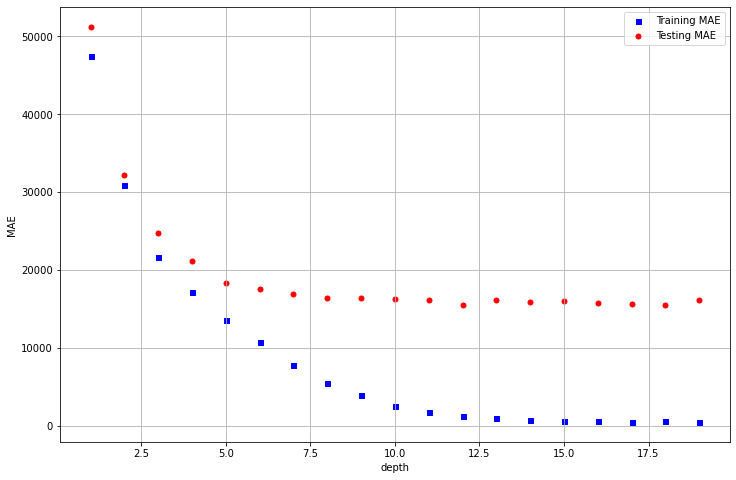

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 20), train_MAE_ada, s=25, c='b', marker="s", label='Training MAE')
ax1.scatter(range(1, 20) ,test_MAE_ada, s=25, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("depth")

plt.legend(loc='upper right')
plt.grid()
plt.show()

#### The best dapth is 8

#### Let's check the best n_estimators 

In [87]:
from sklearn.ensemble import RandomForestRegressor
train_MAE = []
test_MAE = []

n_estimators_values = [5,10,30,50,100,150,200]
for i in n_estimators_values :
    tree = DecisionTreeRegressor(max_depth=8)
    ada_boost = AdaBoostRegressor(tree,n_estimators=i, random_state = 0)
    ada_boost.fit (X_train,y_train)
    y_train_pred = ada_boost.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = ada_boost.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))   

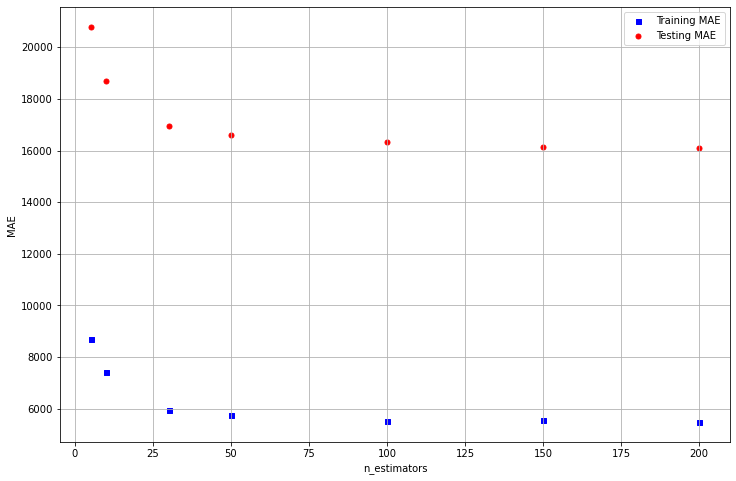

In [88]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(n_estimators_values, train_MAE, s=25, c='b', marker="s", label='Training MAE')
ax1.scatter(n_estimators_values ,test_MAE, s=25, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("n_estimators")

plt.legend(loc='upper right')
plt.grid()
plt.show()

#### A bit overfitted, but the best n_estimators is 200 (better then 100)

### Ada Boost Regressor (with Decision tree)

In [89]:
n_estimators = 200
tree = DecisionTreeRegressor(max_depth=8)
ada_boost_tree = AdaBoostRegressor(tree, n_estimators=n_estimators, random_state=0)
model_mae, mae_train = check_regressor(ada_boost_tree, X_train, y_train, X_test, y_test)
model_name = ada_boost_tree.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

AdaBoostRegressor mean absolute error is 16099.0138 (mae train 5481.3401)


### Ada Boost Regressor (with Random forest)

In [90]:
#better then Ada boost with Decision tree and less overfitted
n_estimators = 30
trees = RandomForestRegressor(max_depth=8)
ada_boost_forest = AdaBoostRegressor(trees, n_estimators=n_estimators, random_state=0)
model_mae, mae_train = check_regressor(ada_boost_forest, X_train, y_train, X_test, y_test)
model_name = ada_boost_forest.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

AdaBoostRegressor mean absolute error is 15818.1215 (mae train 7860.9304)


## Lasso

#### Let's check what is the best alpha

In [91]:
from sklearn.linear_model import Lasso
train_lasso_MAE = []
test_lasso_MAE = []

alpha_values = [1.5,2,5,10,20,25,30,35,40,50,70]
for i in alpha_values :
    lasso = Lasso(alpha=i,normalize=True)
    lasso.fit(X_train_scaled, y_train)
    y_train_pred = lasso.predict(X_train_scaled)
    train_lasso_MAE.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = lasso.predict(X_test_scaled)
    test_lasso_MAE.append(mean_absolute_error(y_test, y_test_pred)) 

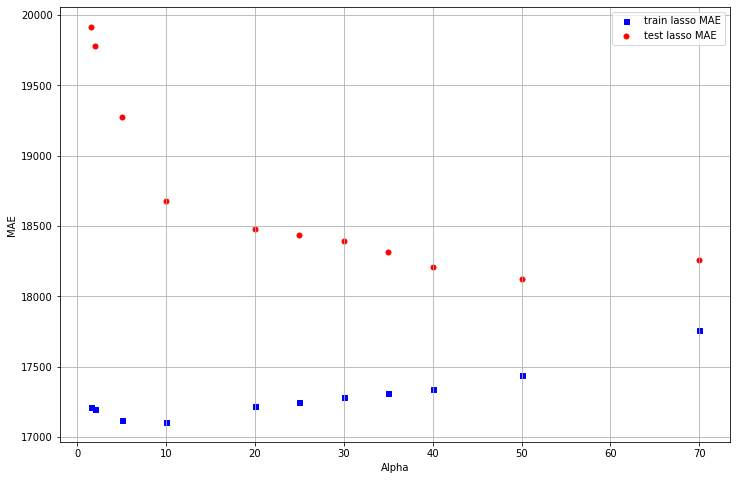

In [92]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(alpha_values , train_lasso_MAE, s=25, c='b', marker="s", label='train lasso MAE')
ax1.scatter(alpha_values ,test_lasso_MAE, s=25, c='r', marker="o", label='test lasso MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("Alpha")
plt.legend(loc='upper right');
plt.grid()
plt.show()

#### The best alpha is alpha = 50

### Lasso regressor

In [93]:
lasso = Lasso(alpha=50, normalize=True)
model_mae, mae_train = check_regressor(lasso, X_train, y_train, X_test, y_test)
model_name = lasso.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

Lasso mean absolute error is 18121.8293 (mae train 17444.0766)


#### Weights of the lasso coefficients

In [94]:
cof = lasso.coef_
features = X_train.columns
coef = pd.DataFrame({'Coef':cof},index=features)

coef.sort_values(by=['Coef'], ascending=False).head(-8)

,Coef
Neighborhood_high_society,34754.754831
BsmtQual_Ex,29656.079088
KitchenQual_Ex,28653.458104
BsmtExposure_Gd,15828.292899
BldgType_1Fam,14369.575713
...,...
ExterQual_Ex,0.000000
ExterQual_Gd,0.000000
OpenPorchSF,0.000000
LotFrontage,-29.164849


## Gradient Boosting

#### Lat's check what is the best n_estimators

In [95]:
from sklearn.ensemble import GradientBoostingRegressor 

In [96]:
train_MAE_boost = []
test_MAE_boost = []

n_estimators_values = [50,100,150,180,200,220,250]
for i in n_estimators_values :
    GBT = GradientBoostingRegressor(random_state=0,n_estimators = i)
    GBT.fit(X_train, y_train)
    y_train_pred = GBT.predict(X_train)
    train_MAE_boost.append(mean_absolute_error(y_train,y_train_pred))
    y_test_pred = GBT.predict(X_test)
    test_MAE_boost.append(mean_absolute_error(y_test, y_test_pred)) 

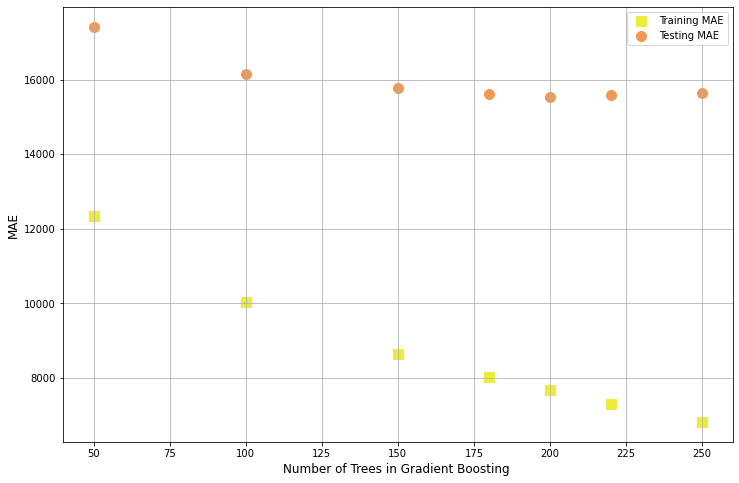

In [97]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(n_estimators_values, train_MAE_boost, s=100, c='#EBEE36', marker="s", label='Training MAE')
ax1.scatter(n_estimators_values ,test_MAE_boost, s=100, c='#F39855', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE", fontsize = 12)
ax1.set_xlabel("Number of Trees in Gradient Boosting ", fontsize = 12)
plt.legend(loc='upper right');
plt.grid()
plt.show()

#### The best n_estimators is 200

### Gradient Boosting regressor

In [99]:
GBT = GradientBoostingRegressor(loss = 'ls',random_state=0,n_estimators = 200, max_depth=3 )
model_mae, mae_train = check_regressor(GBT, X_train_scaled, y_train, X_test_scaled, y_test)
model_name = GBT.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

GradientBoostingRegressor mean absolute error is 15536.6234 (mae train 7668.3930)


#### Features importance in the Gradient Boosting

In [100]:
feature_importances = GBT.feature_importances_
features = X_train.columns
importnce = pd.DataFrame({'feature':features, 'importance':feature_importances})
#stats = stats.sort_values(by=['importance'])
importnce.head(10)

,feature,importance
0,LotFrontage,0.003353
1,LotArea,0.016055
2,OverallQual,0.415381
3,OverallCond,0.007006
4,YearBuilt,0.009009
5,YearRemodAdd,0.006830
6,MasVnrArea,0.001444
7,BsmtFinSF1,0.033221
8,BsmtUnfSF,0.002564
9,TotalBsmtSF,0.035476


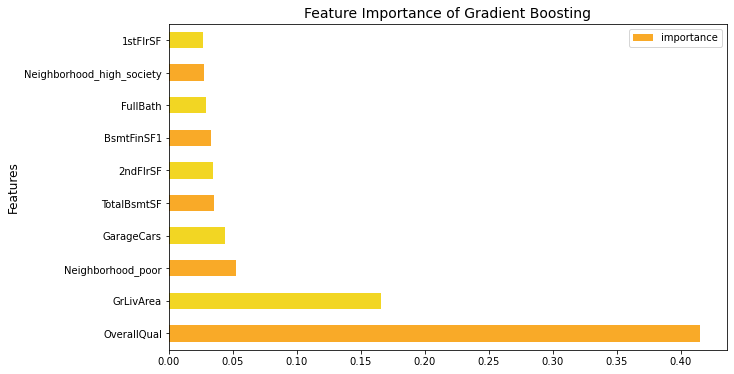

In [101]:
top_10 = importnce.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh', figsize = (10,6) , color = ['#F9AA28','#F2D623'] )
plt.title('Feature Importance of Gradient Boosting', fontsize = 14)
plt.ylabel('Features', fontsize = 12);

## Comparison of the MAE between the models

In [102]:
def compare_MAE(models_errors_train, models_errors):
    return pd.DataFrame({'Train':models_errors_train, 'Test':models_errors}).sort_values('Test')

mae_compare = compare_MAE(models_errors_train, models_errors)


In [103]:
#The gradient boosting algorithm has a Little bit of over-fitting - But we will live with it
def highlight_max(s):
    is_max = s == s.min()
    return ['background-color: #E5EC87' if v else '' for v in is_max]

mae_compare.style.apply(highlight_max)

,Train,Test
GradientBoostingRegressor,7668.392952,15536.623444
AdaBoostRegressor,7860.930420,15818.121479
RandomForestRegressor,8821.483733,16955.231444
Lasso,17444.076578,18121.829275
LinearRegression,17298.520273,20482.442298
KNeighborsRegressor,18998.986152,23018.621302
DecisionTreeRegressor,13558.066726,24896.209337
Baseline,nan,55902.484587


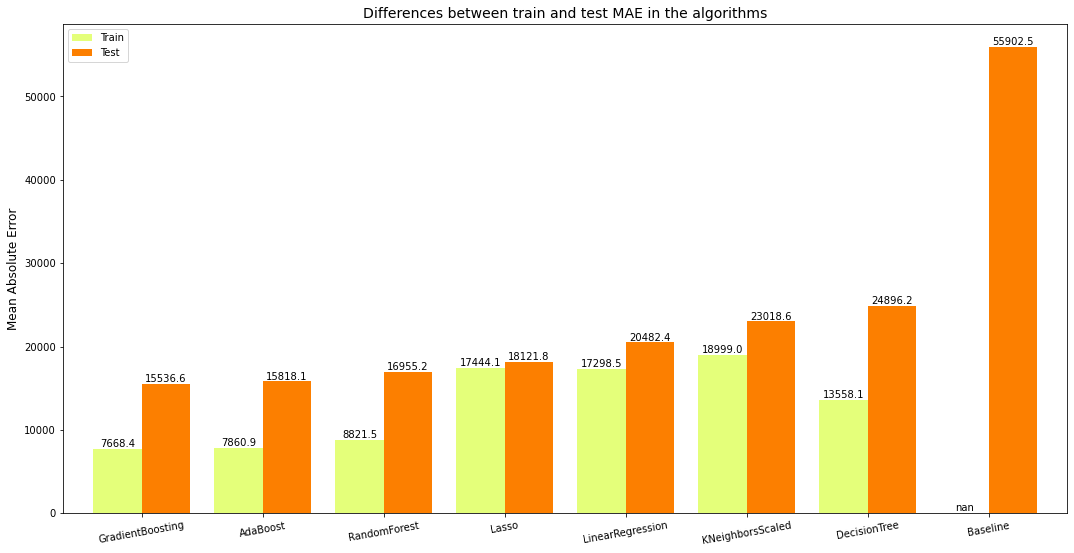

In [105]:
train_mae = mae_compare['Train'].values.tolist()
test_mae = mae_compare['Test'].values.tolist()
models = ['GradientBoosting','AdaBoost','RandomForest','Lasso','LinearRegression','KNeighborsScaled','DecisionTree','Baseline' ]
dfcomp = pd.DataFrame({'Train': train_mae, 'Test': test_mae}, index=models)
ax = dfcomp.plot.bar(rot=10,colormap='Wistia', width=0.8 ,figsize = (18,9))
ax.set_title('Differences between train and test MAE in the algorithms',fontsize = 14)
ax.set_ylabel('Mean Absolute Error', fontsize = 12)


rects = ax.patches
round_train = [round(num,1) for num in train_mae]
round_test = [round(num,1) for num in test_mae]
joinedlist = round_train + round_test
labels = joinedlist

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


## 9.a

#### Let's check the performance of Gradient Boosting using Different sizes of the train set


In [106]:
data1 = data.copy()

In [107]:
jump = np.arange(0.1,1,0.05).tolist()

In [108]:
from sklearn.model_selection import train_test_split
X, y = data1.drop('SalePrice', axis=1), data.SalePrice
MAE_test = []
MAE_train = []

for i in jump:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=i, random_state=0, shuffle=True)
    X_train_scaled1 = scaler.fit_transform(X_train1)
    X_test_scaled1 = scaler.transform(X_test1)
    GBT.fit(X_train_scaled1,y_train1)
    y_pred1 = GBT.predict(X_test_scaled1)
    MAE_test.append(mean_absolute_error(y_test1,y_pred1))
    y_pred_train1 = GBT.predict(X_train_scaled1)
    MAE_train.append(mean_absolute_error(y_train1,y_pred_train1))

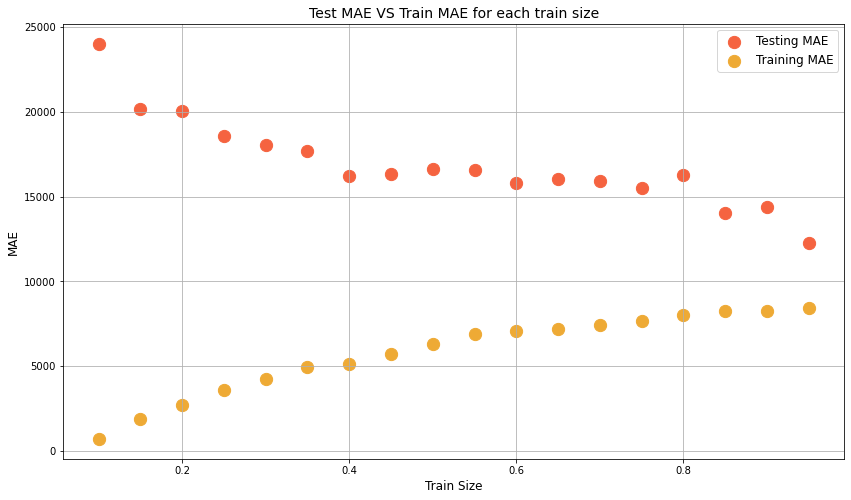

In [109]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)

ax1.scatter(jump,MAE_test, s=150 , c='#F56340' ,label='Testing MAE')
ax1.scatter(jump,MAE_train, s=150 , c='#EEAA35', label='Training MAE')
ax1.set_ylabel("MAE", fontsize = 12)
ax1.set_xlabel('Train Size', fontsize = 12)
plt.title('Test MAE VS Train MAE for each train size',  fontsize = 14)
plt.legend(loc='upper right',prop={'size': 12})
plt.grid()
plt.show()

# Feature selection - RFE

#### Lat's check with RFE how many and which feature will gave us the lowest MAE

## Evaluation function - RFE

In [110]:
from sklearn.feature_selection import RFE

maes_train = []
maes_test = []

#the best features for each data size (by features) 

def check_features (regressor, X_train,y_train, X_test, y_test ):
    for i in range(90,len(X_train_scaled[0])-10):
        estimator = regressor
        selector = RFE(estimator, n_features_to_select=i, step=1)
        selector = selector.fit(X_train, y_train)
        cols = selector.support_
        X_new1 = X_train[:,cols]
        reg = regressor
        reg.fit(X_new1,y_train)
        y_pred = reg.predict(X_test[:,cols])
        mae = mean_absolute_error(y_test, y_pred)
        y_pred_train = reg.predict(X_new1)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        maes_train.append(mae_train)
        maes_test.append(mae)  
        
#After examining all the options, we found that 94 features give the best result.
#For better running time - we reduced the range to 90 to 100.        

## Gradient Boosting with RFE

#### Let's check how many selected features will give the lowest MAE 

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
GBT = GradientBoostingRegressor(random_state=0,n_estimators=200)
check_features(GBT, X_train_scaled, y_train, X_test_scaled, y_test)

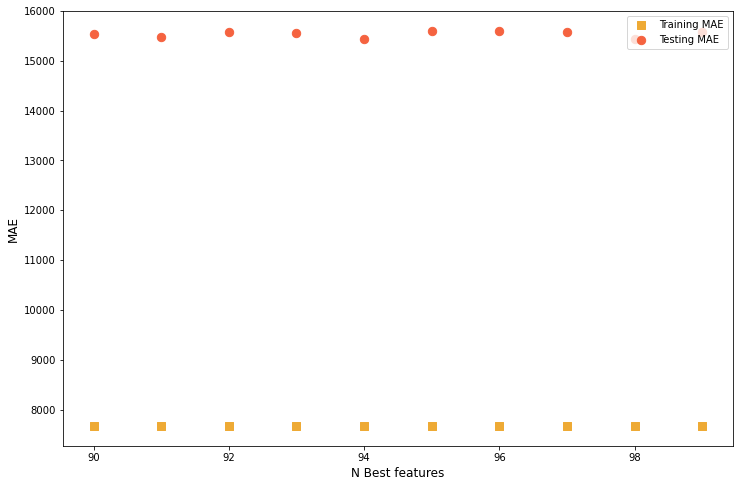

In [116]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.scatter(range(90,100), maes_train, s=70, c='#EEAA35', marker="s", label='Training MAE')
ax1.scatter(range(90,100) ,maes_test, s=70, c='#F56340', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE",fontsize = 12)
ax1.set_xlabel("N Best features",fontsize = 12)

plt.legend(loc='upper right');
plt.show()

#### n_features_to_select = 94 gives the lowest MAE

In [114]:
selector = RFE(GBT, n_features_to_select=94, step=1)
selector = selector.fit(X_train_scaled, y_train)
cols = selector.support_
X_train_select = X_train_scaled[:,cols]
X_test_select = X_test_scaled[:,cols]

In [115]:
GBT = GradientBoostingRegressor(loss = 'huber', random_state=0,n_estimators=200, max_depth=3, criterion= 'friedman_mse')
model_mae, mae_train = check_regressor(GBT, X_train_select, y_train, X_test_select, y_test)
model_name = GBT.__class__.__name__
models_errors[model_name] = model_mae
models_errors_train[model_name] = mae_train

GradientBoostingRegressor mean absolute error is 15280.5629 (mae train 7996.7348)


#### The MAE on the test set decreased and on the train set remained the same 👌🏻

In [118]:
## We ran to see if RFE improves Ada-boost, it does improve, but tough running time
''''from sklearn.ensemble import AdaBoostRegressor

maes_train = []
maes_test = []

tree = DecisionTreeRegressor(max_depth=8)
ada_boost = AdaBoostRegressor(tree,n_estimators=100, random_state = 0)
check_features(ada_boost, X_train1, y_train, X_test1, y_test)

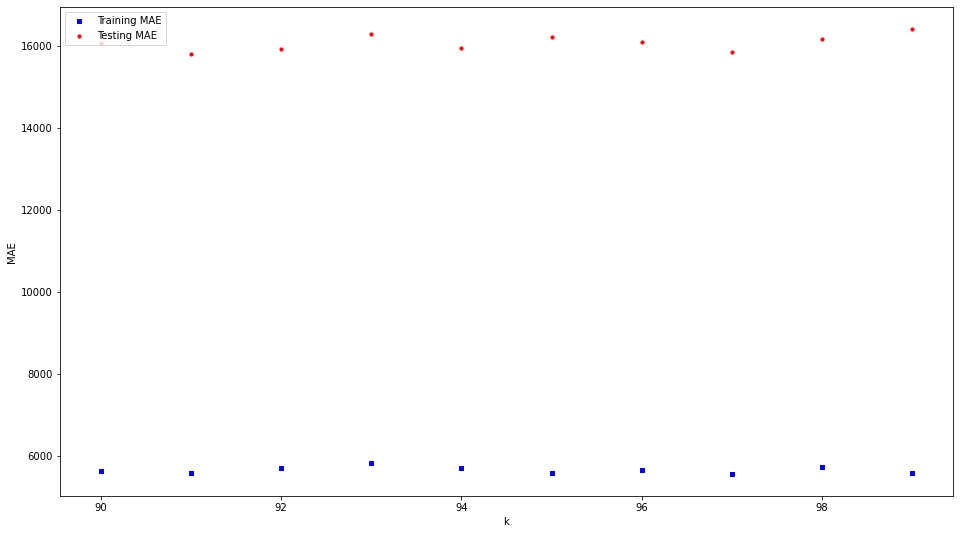

In [119]:
''''fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)

ax1.scatter(range(90,100), maes_train, s=10, c='b', marker="s", label='Training MAE')
ax1.scatter(range(90,100) ,maes_test, s=10, c='r', marker="o", label='Testing MAE')
ax1.set_ylabel("MAE")
ax1.set_xlabel("N best features")

plt.legend(loc='upper left');
plt.show()

In [125]:
''''from sklearn.linear_model import LinearRegression

maes_train = []
maes_test = []

linear_regressor = LinearRegression()
check_features(linear_regressor, X_train1, y_train, X_test1, y_test)

In [ ]:
#We ran the RFE on all the models, it did improve the results in all of them (except Lasso)
#but again, the runtime was too long so we deleted most of the code.